In [1]:
import os
os.getcwd()

'C:\\Users\\user'

In [2]:
os.chdir('C:/Users/user/Desktop/김한결/파이썬/bike-sharing-demand')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus']=False


In [4]:
train=pd.read_csv('train.csv',parse_dates=['datetime'])
train.shape

(10886, 12)

In [5]:
test=pd.read_csv('test.csv',parse_dates=['datetime'])
test.shape

(6493, 9)

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [11]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

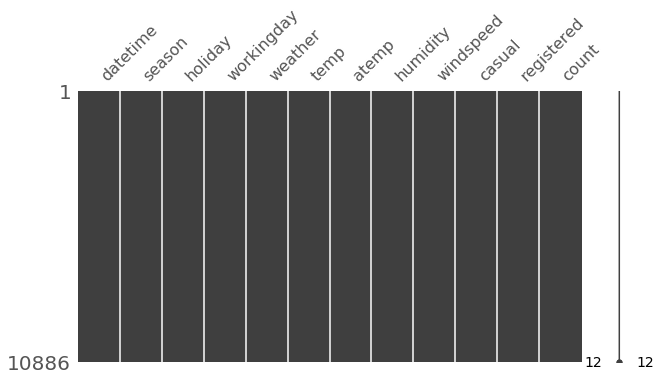

In [13]:
import missingno as msno
msno.matrix(train, figsize=(10,5))

In [14]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

(10886, 18)

In [15]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test.shape

(6493, 15)

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [17]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별')]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current fon

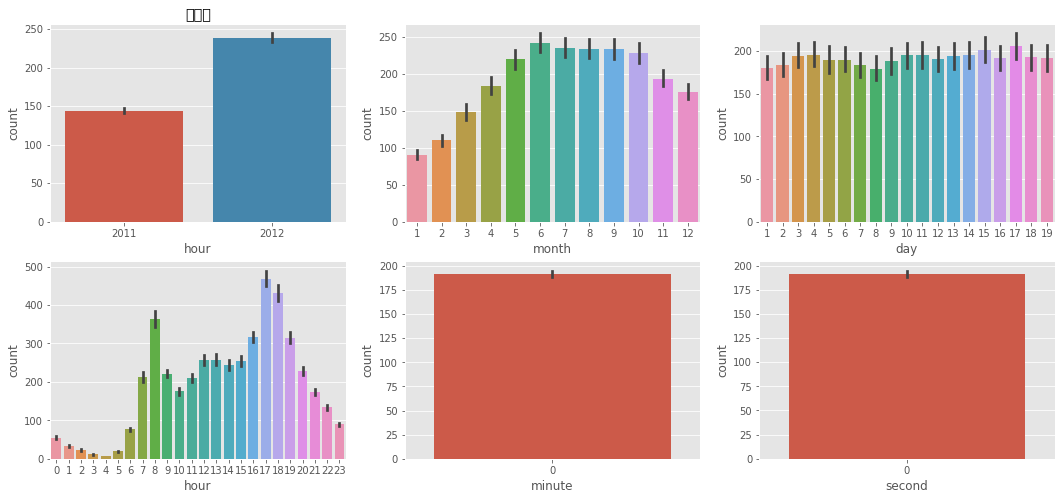

In [18]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count',ax=ax3)
sns.barplot(data=train,x='hour',y='count',ax=ax4)
sns.barplot(data=train,x='minute',y='count',ax=ax5)
sns.barplot(data=train,x='second',y='count',ax=ax6)

ax1.set(ylabel='count',title='연도별 대여량')
ax1.set(xlabel='month',title='월별' )
ax1.set(xlabel='day',title='일별 대여량')
ax1.set(xlabel='hour',title='시간별')


In [19]:
import matplotlib.font_manager as fm

In [20]:
fontlist=fm.findSystemFonts(fontpaths=None,fontext='ttf')

In [21]:
[i for i in fontlist if 'Nanum' in i]

[]

In [22]:
plt.rcParams['font.family']='Malgun Gothic'

In [23]:
f = [f.name for f in fm.fontManager.ttflist]

In [24]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

[('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHIC.TTF'),
 ('Franklin Gothic Demi', 'C:\\WINDOWS\\Fonts\\FRADM.TTF'),
 ('Letter Gothic Std', 'C:\\WINDOWS\\Fonts\\LetterGothicStd-Slanted.otf'),
 ('Kozuka Gothic Pro', 'C:\\WINDOWS\\Fonts\\KozGoPro-Bold.otf'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF'),
 ('Copperplate Gothic Light', 'C:\\Windows\\Fonts\\COPRGTL.TTF'),
 ('Copperplate Gothic Bold', 'C:\\Windows\\Fonts\\COPRGTB.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHV.TTF'),
 ('Kozuka Gothic Pr6N', 'C:\\WINDOWS\\Fonts\\KozGoPr6N-Regular.otf'),
 ('Yu Gothic', 'C:\\Windows\\Fonts\\YuGothR.ttc'),
 ('Letter Gothic Std', 'C:\\Windows\\Fonts\\LetterGothicStd-BoldSlanted.otf'),
 ('Kozuka Gothic Pr6N', 'C:\\WINDOWS\\Fonts\\KozGoPr6N-ExtraLight.otf'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICBI.TTF'),
 ('Franklin Gothic Medium Cond', 'C:\\Windows\\Fonts\\FRAMDCN.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\G

[Text(0.5, 0, 'working'), Text(0.5, 1.0, '근무일 ')]

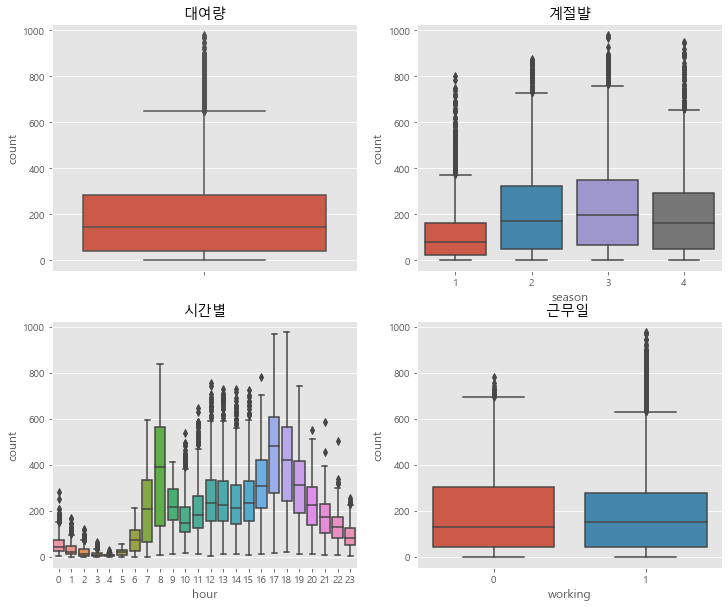

In [25]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train,y='count',orient='v',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='workingday',orient='v',ax=axes[1][1])
axes[0][0].set(ylabel='count',title='대여량')
axes[0][1].set(xlabel='season',title='계절뱔')
axes[1][0].set(xlabel='hour',title='시간별')
axes[1][1].set(xlabel='working',title='근무일 ')

In [26]:
train['dayofweek']=train['datetime'].dt.dayofweek

In [27]:
test['dayofweek']=test['datetime'].dt.dayofweek

In [28]:
test['dayofweek'].value_counts()

4    958
5    928
0    928
2    924
6    923
3    918
1    914
Name: dayofweek, dtype: int64

In [29]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

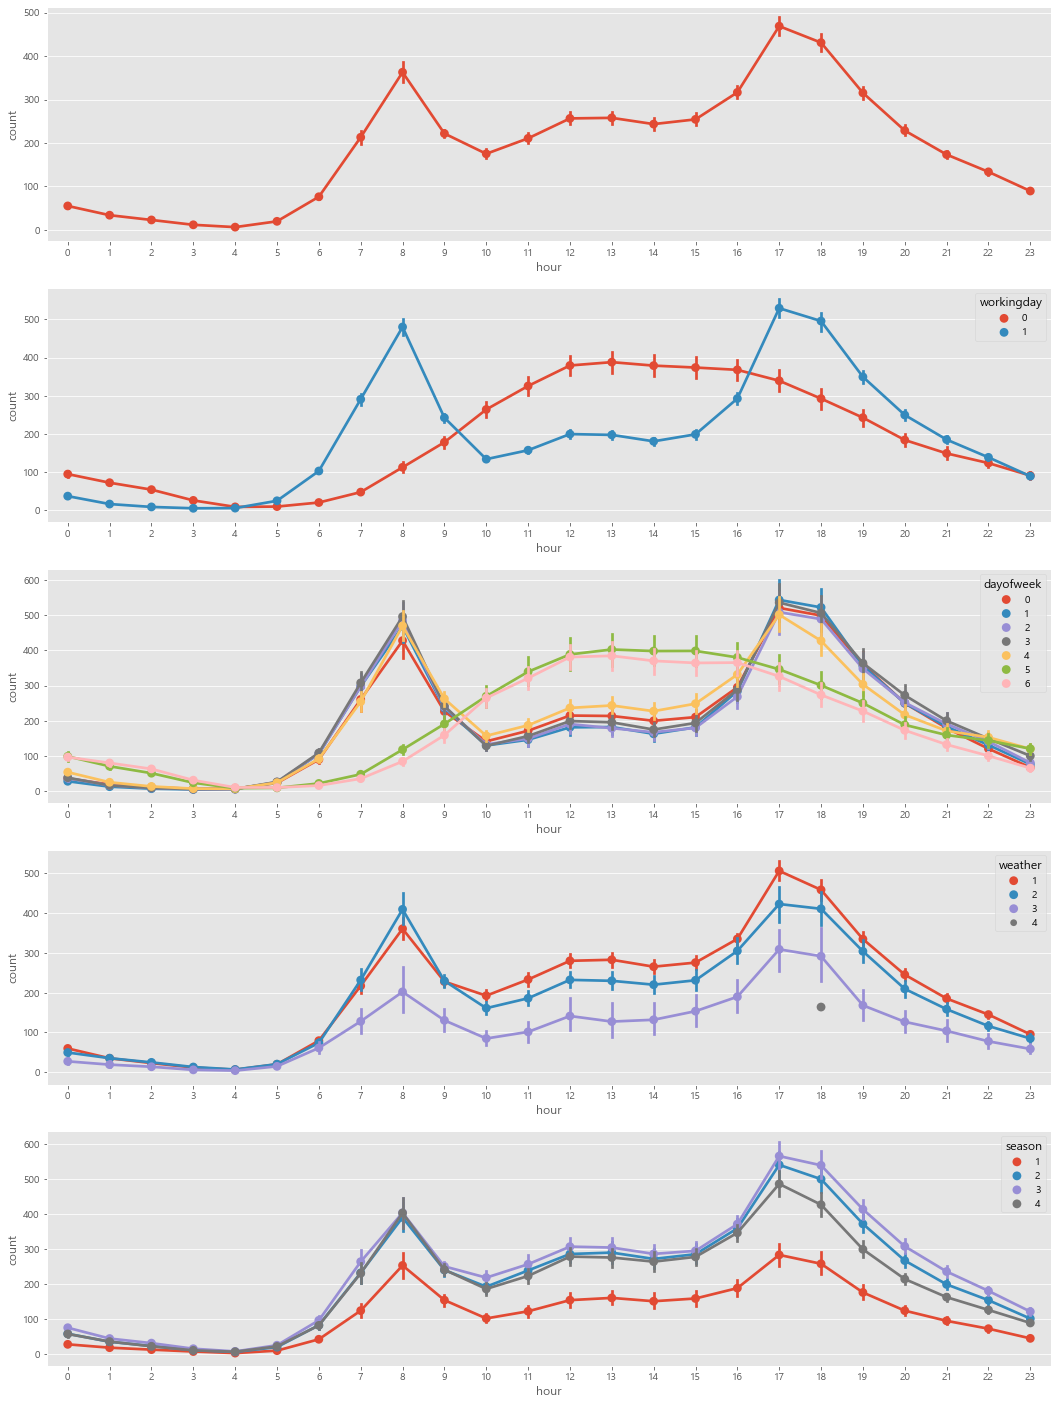

In [30]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train,x='hour',y='count',ax=ax1)
sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax2)
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=ax3)
sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=ax4)
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax5)

In [31]:
corrMatt=train[['temp','atemp','casual','registered','humidity','windspeed'
               ,'count']]
  

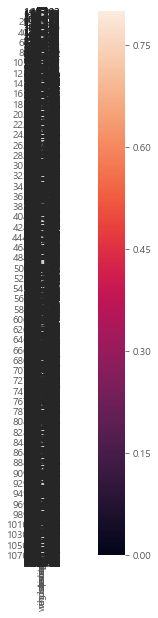

In [32]:
fig, ax=plt.subplots()
fig.set_size_inches(20
                    ,10)
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data=corrMatt,mask=mask,vmax=.8,square=True,annot=True)

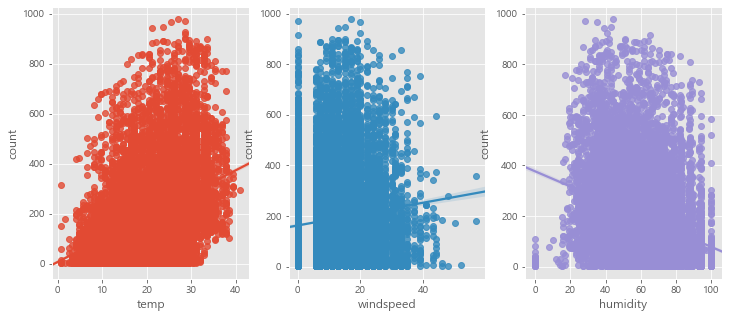

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=train,ax=ax1)
sns.regplot(x='windspeed',y='count',data=train,ax=ax2)
sns.regplot(x='humidity',y='count',data=train,ax=ax3)

In [34]:
def m_y(a):
    return '{}-{}'.format(a.year,a.month)
train['year-month']=train['datetime'].apply(m_y)


In [35]:
train['year-month'].head()

0    2011-1
1    2011-1
2    2011-1
3    2011-1
4    2011-1
Name: year-month, dtype: object

In [36]:
from sklearn.metrics import make_scorer
def rmsle(predict,actual):
    
    predict=np.array(predict)
    actual=np.array(actual)
    log_predict=np.log(predict+1)
    log_actual=np.log(actual+1)
    difference=log_predict-log_actual
    diff=np.square(difference)
    mean_diff=diff.mean()
    score=np.sqrt(mean_diff)
    
    return score


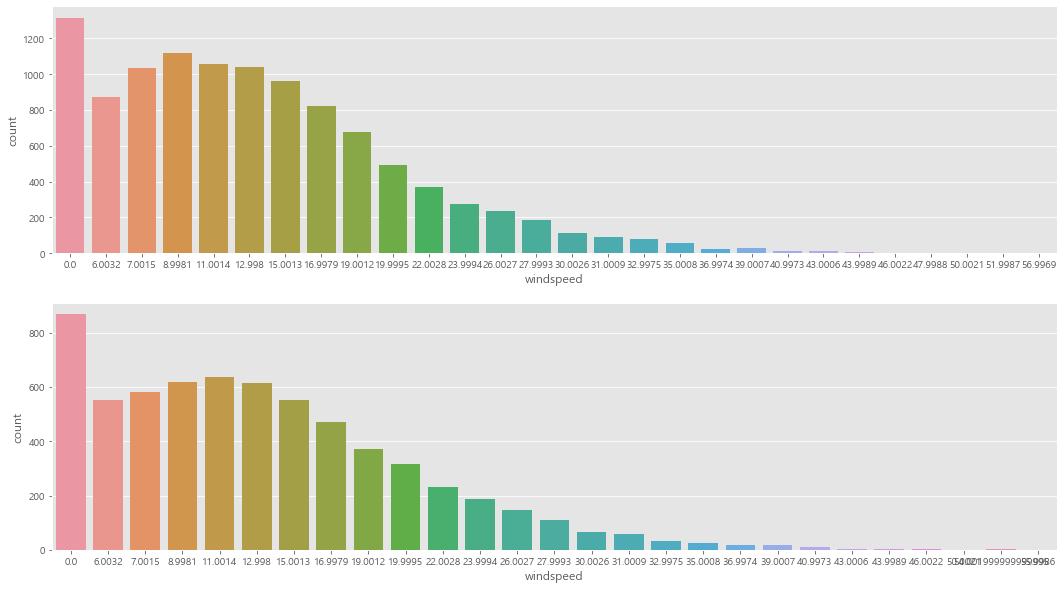

In [37]:
fig, (ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(18,10)

sns.countplot(data=train,x='windspeed',ax=ax1)
sns.countplot(data=test,x='windspeed',ax=ax2)

In [38]:
train.loc[train['windspeed']==0,'windspeed']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10826    0.0
10829    0.0
10846    0.0
10860    0.0
10862    0.0
Name: windspeed, Length: 1313, dtype: float64

In [39]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
    datawind0=data.loc[data['windspeed']==0]
    datawindnot0=data.loc[data['windspeed']!=0]
    
    #풍속을 예측할 피처를 선택, 학습할 데이터 타입 스트링으로
    wCol=['season','weather','humidity','month','temp','year','atemp']
    datawindnot0['windspeed']=datawindnot0['windspeed'].astype('str')
    
    #랜덤포레스트 분류기 사용
    rfModel_wind=RandomForestClassifier()
    
    #wCol에 있는 피처의 값을 바탕으로 풍속을 학습
    rfModel_wind.fit(datawindnot0[wCol],datawindnot0['windspeed'])
    
    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측
    wind0Values=rfModel_wind.predict(X=datawind0[wCol])
    
    #값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임 새로 만듦
    predictwind0=datawind0
    predictwindnot0=datawindnot0
    
    # 예측한 값 넣어주기
    predictwind0['windspeed']=wind0Values
    
    # 원래 0 이 아니었던 데이터와 0이어서 예측한 데이터 통합
    data=predictwindnot0.append(predictwind0)
    
    # 풍속 데이터 타입 다시 float으로
    data['windspeed']=data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    return data
rmsle_scorer=make_scorer(rmsle)
rmsle_scorer
    

make_scorer(rmsle)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


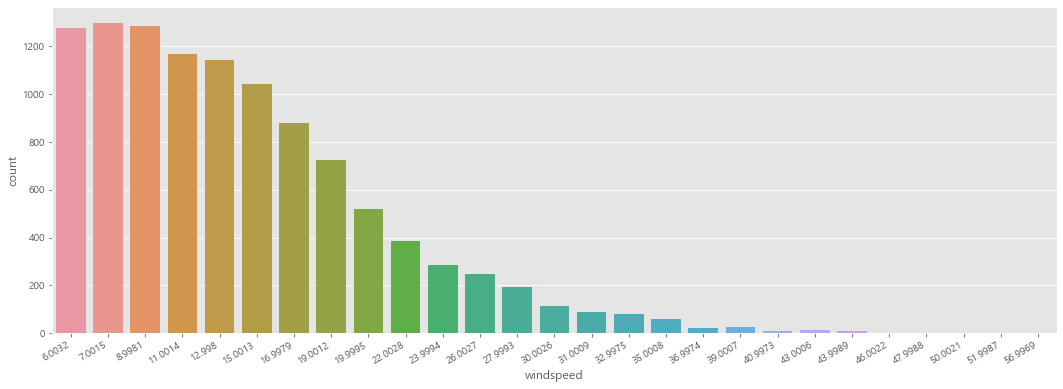

In [40]:
train=predict_windspeed(train)

fig,ax1=plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
plt.xticks(rotation=30,ha='right')
sns.countplot(data=train,x='windspeed',ax=ax1)

In [41]:
categorical_feature_names=['season','holiday','workingday','weather','dayofweek','month','year','hour']

for var in categorical_feature_names:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

In [54]:
feature_names=['season','holiday','workingday','weather','dayofweek',
               'month','year','hour','humidity','temp','atemp']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'dayofweek',
 'month',
 'year',
 'hour',
 'humidity',
 'temp',
 'atemp']

In [55]:
x_train=train[feature_names]
print(x_train.shape)

(10886, 11)


In [56]:
x_train.head()

,season,holiday,workingday,weather,dayofweek,month,year,hour,humidity,temp,atemp
0,1,0,0,2,5,1,2011,5,75,9.84,12.880
1,1,0,0,1,5,1,2011,10,76,15.58,19.695
2,1,0,0,1,5,1,2011,11,81,14.76,16.665
3,1,0,0,1,5,1,2011,12,77,17.22,21.210
4,1,0,0,2,5,1,2011,13,72,18.86,22.725


In [57]:
x_test=test[feature_names]
x_test.head()

,season,holiday,workingday,weather,dayofweek,month,year,hour,humidity,temp,atemp
0,1,0,1,1,3,1,2011,0,56,10.66,11.365
1,1,0,1,1,3,1,2011,1,56,10.66,13.635
2,1,0,1,1,3,1,2011,2,56,10.66,13.635
3,1,0,1,1,3,1,2011,3,56,10.66,12.880
4,1,0,1,1,3,1,2011,4,56,10.66,12.880


In [58]:
label_name='count'
y_train=train[label_name]
y_train.head()

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)


In [48]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [49]:
score= cross_val_score(model,x_train,y_train,cv=k_fold,scoring=rmsle_scorer)
score=score.mean()
print('{0:.5f}'.format(score))

0.32362


In [50]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [51]:
predictions=model.predict(x_test)
predictions[:10]

array([ 11.43,   5.46,   3.95,   3.37,   3.03,   5.67,  35.59,  87.49,
       197.4 , 119.97])

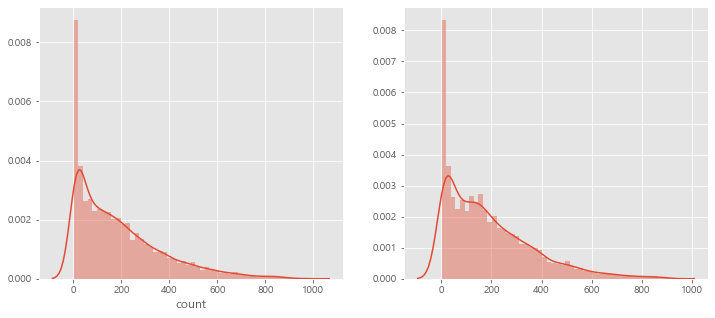

In [52]:
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(predictions,ax=ax2,bins=50)

In [53]:
train['count']

0          1
1         36
2         56
3         84
4         94
        ... 
10881    232
10882    211
10883    662
10884    132
10885     41
Name: count, Length: 10886, dtype: int64

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment =None
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 선형 회귀 모델을 초기화
lModel=LinearRegression()

# 모델을 학습
y_train_log=np.log1p(y_train) #1을 더한 수에 log씌움
lModel.fit(x_train,y_train_log)

# 예측하고 정확도를 평가
preds=lModel.predict(x_train)
print(rmsle(np.exp(y_train_log),np.exp(preds)))




0.9785390506006754


In [67]:
ridge_m_=Ridge()
ridge_Params_={'max_iter':[3000],'alpha':[0.01,0.1,1,2,3,4,
                                    10,30,100,200,300,400,800,900,1000]}
rmsle_scorer=metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge_m=GridSearchCV(ridge_m_,
                           ridge_Params_,
                           scoring=rmsle_scorer,
                           cv=5
                          )
y_train_log=np.log1p(y_train)
grid_ridge_m.fit(x_train,y_train_log)
preds=grid_ridge_m.predict(x_train)
print(grid_ridge_m.best_params_)
print(rmsle(np.exp(y_train_log),np.exp(preds)))

print(grid_ridge_m)


{'alpha': 0.01, 'max_iter': 3000}
0.9785390490553846
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300,
                                   400, 800, 900, 1000],
                         'max_iter': [3000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(rmsle, greater_is_better=False), verbose=0)
